# IV. Exercises
## 1. Job Market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market(3).csv', sep=',')

df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


### Job by location

In [2]:
locationDf = df.groupby('Location')['Id'].count().sort_values(ascending = False).reset_index().rename(columns = {'Id':'Id_count'})
locationDf

,Location,Id_count
0,Sydney,2784
1,Melbourne,2481
2,Brisbane,1119
3,Perth,677
4,Adelaide,390
...,...,...
60,Fleurieu Peninsula & Kangaroo Island,6
61,"Tumut, Snowy & Monaro",4
62,Somerset & Lockyer,4
63,Central & South East TAS,3


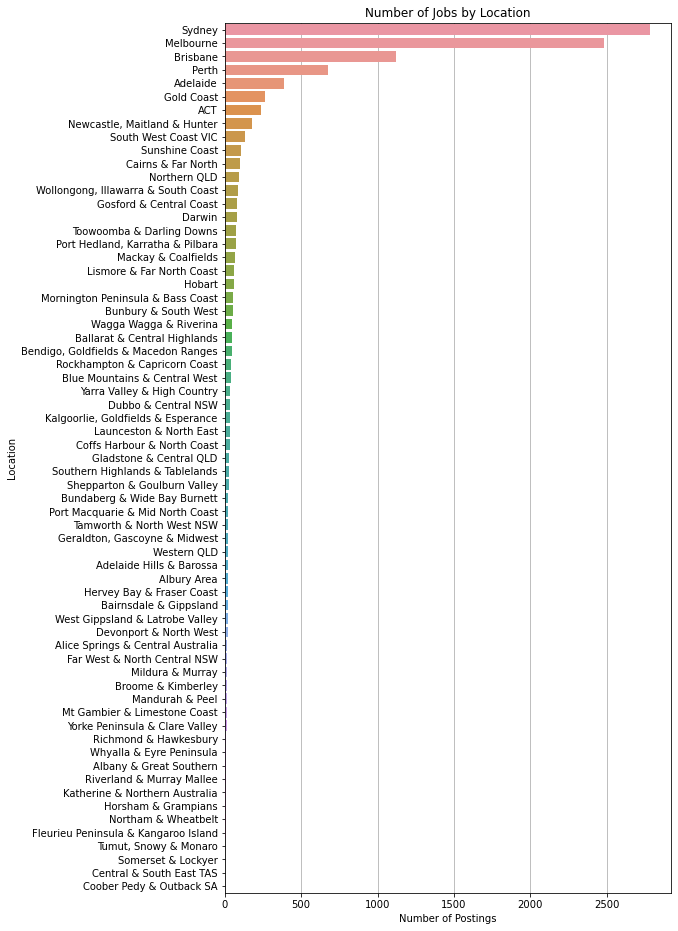

In [3]:
# Location plot
fig, axes = plt.subplots(figsize=(8,16))
axes = plt.grid(zorder=0)
axes = sns.barplot(data=locationDf, x="Id_count", y="Location", zorder=2) 

axes.set_xlabel('Number of Postings')
axes.set_title('Number of Jobs by Location')

plt.show()

---

### Job posts by salary range

In [4]:
import matplotlib
#create dataframe for salary ranges

salaryDf = df.groupby(['LowestSalary','HighestSalary'])['Id'].count().reset_index().rename(columns = {'Id':'Id_count'})
# Convert Floats to Integers 
salaryDf['LowestSalary'] = salaryDf['LowestSalary'].astype(int)
salaryDf['HighestSalary'] = salaryDf['HighestSalary'].astype(int)
# Combine Two Columns of Text in a new column
salaryDf['SalaryRange'] = salaryDf['LowestSalary'].astype(str)+'-'+ salaryDf['HighestSalary'].astype(str)
salaryDf

,LowestSalary,HighestSalary,Id_count,SalaryRange
0,0,30,3894,0-30
1,30,40,1842,30-40
2,40,50,2519,40-50
3,50,60,1844,50-60


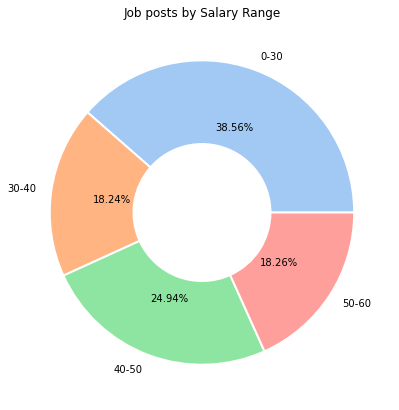

In [5]:
#salary ranges plot

fig, axes = plt.subplots(figsize=(7,7))
# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

plt.pie(salaryDf['Id_count'], labels=salaryDf['SalaryRange'], colors = colors, 
                        wedgeprops={"width":0.55, "edgecolor" : "white",
                      'linewidth': 2, 'antialiased': True}, autopct='%.2f%%')

axes.set_title("Job posts by Salary Range")

plt.show()

---

### Job posts by location [OPTIONAL]

In [6]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


In [7]:
# Create a new dataframe for only 5 cities
location_cities = pd.DataFrame(locationDf)
location_cities = locationDf.filter(items = ['Brisbane', 'Adelaide', 'Melbourne', 'Perth', 'Sydney'], 
                                axis = 0).sort_values('Id', ascending = False)
location_cities

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
Sydney,2784,2784,2647,2784,2552,2784,2784,2784,2733,2784,2784,2735,Sydney,2784
Melbourne,2481,2481,2338,2481,2290,2481,2481,2481,2406,2481,2481,2407,Melbourne,2481
Brisbane,1119,1119,1056,1119,987,1119,1119,1119,1086,1119,1119,1086,Brisbane,1119
Perth,677,677,654,677,563,677,677,677,652,677,677,655,Perth,677
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390


In [8]:
# Create a new dataframe for others
location_others = pd.DataFrame(locationDf).drop(['Brisbane', 'Adelaide', 'Melbourne', 
                                                                  'Perth', 'Sydney'])
# Calculate the sum of count for all other cities 
sum = location_others.sum()

# Add the sum for all other cities to the dataframe for only 5 cities
location_cities.loc['Others'] = pd.Series(sum)
location_cities

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
Sydney,2784,2784,2647,2784,2552,2784,2784,2784,2733,2784,2784,2735,Sydney,2784
Melbourne,2481,2481,2338,2481,2290,2481,2481,2481,2406,2481,2481,2407,Melbourne,2481
Brisbane,1119,1119,1056,1119,987,1119,1119,1119,1086,1119,1119,1086,Brisbane,1119
Perth,677,677,654,677,563,677,677,677,652,677,677,655,Perth,677
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Others,2648,2648,2432,2648,0,2648,2648,2648,2592,2648,2648,2595,ACTAdelaide Hills & BarossaAlbany & Great Sout...,2648


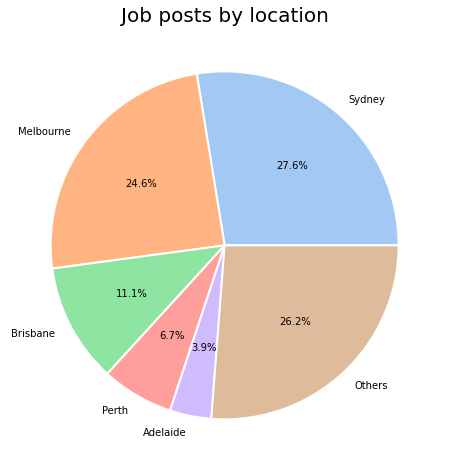

In [9]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

fig, axes = plt.subplots(figsize=(8, 8))
# define Seaborn color palette to use
colors = sns.color_palette('pastel')

plt.pie(location_cities['Id'], labels=location_cities.index, colors = colors, 
                        wedgeprops={"edgecolor" : "white",
                      'linewidth': 2, 'antialiased': True}, autopct='%.1f%%')

axes.set_title("Job posts by location", fontsize = 20)

plt.show()

---

## 2. Data Correlation

In [10]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix as sm
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

#Load wine
wine = pd.read_csv('wine.data.csv', sep=',')
print(wine['Label'].unique())
wine.head()

[1 2 3]


,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# True labels
label = wine['Label']
del wine['Label']
# Data description
print("Types of variables:\n",wine.dtypes)

wine.describe()

Types of variables:
 Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


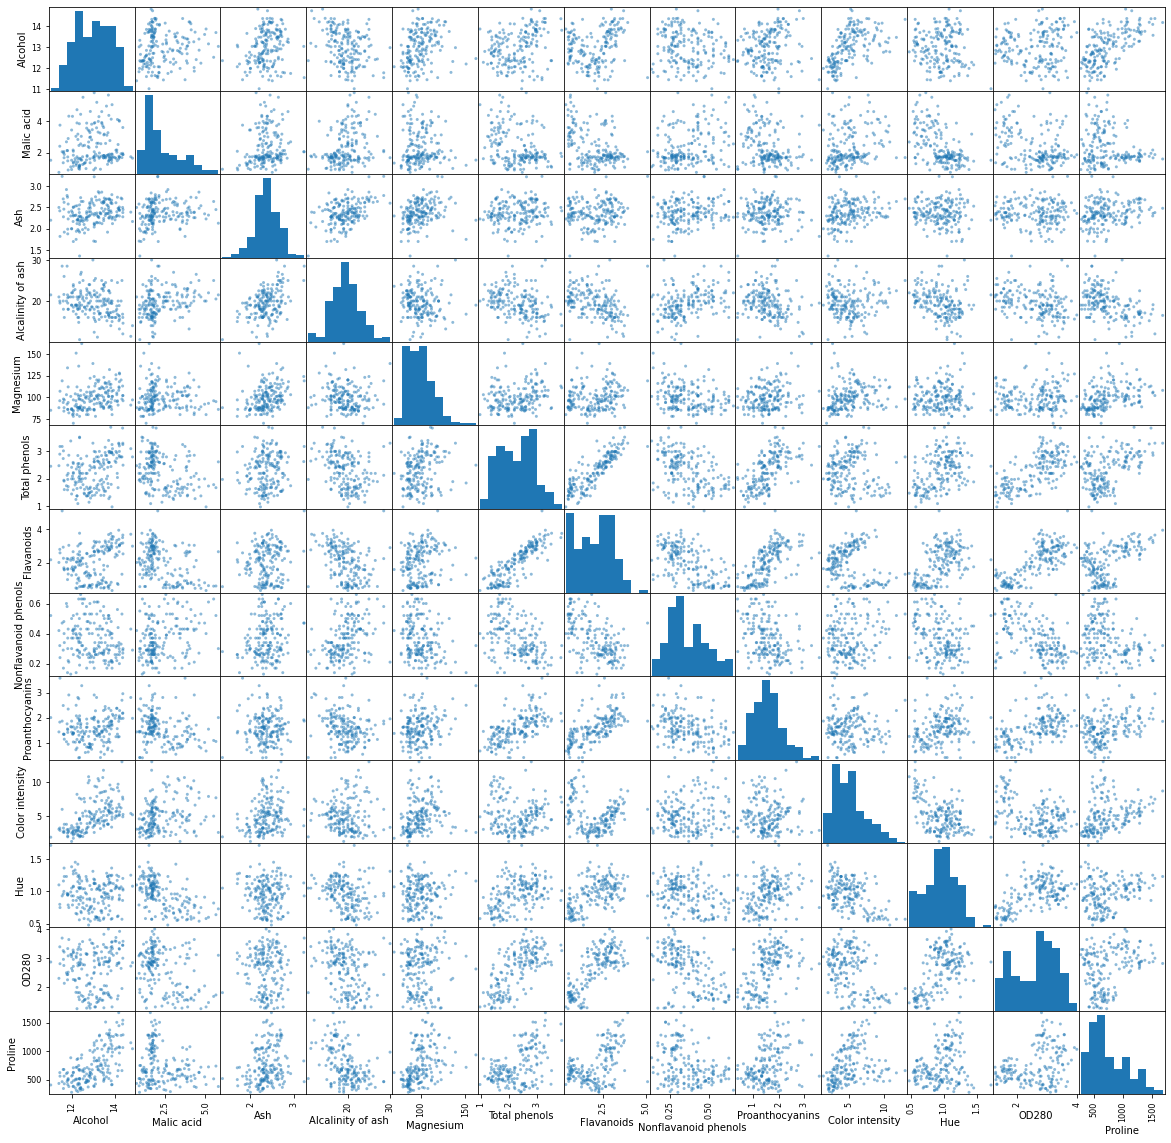

In [12]:
# Scatter plot
sm(wine, figsize=(20,20))
plt.show()

__Conclusion:__<br>
There is a strong positive correlation between "Flavanoids" and "Total phenols", and the others are difficult to cluster.

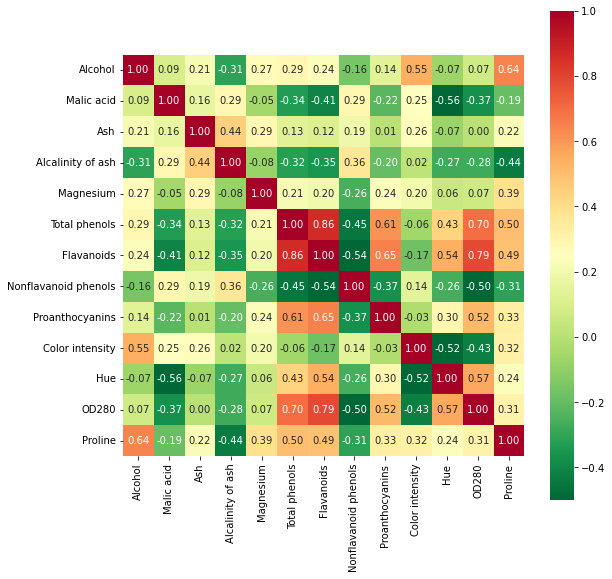

In [13]:
# Correlation Heatmap
plt.subplots(figsize = (9,9))
sns.heatmap(wine.corr(), vmin=-0.5, vmax=1, annot=True, fmt='.2f', cmap='RdYlGn_r', square=True)
plt.show()

__The three pairs of attributes which have the largest correlation are:__<br>
* "Flavanoids" and "Total phenols" (0.86)<br>
*  "OD280" and "Flavanoids" (0.79)<br>
*  "OD280" and "Total phenols" (0.7)<br>

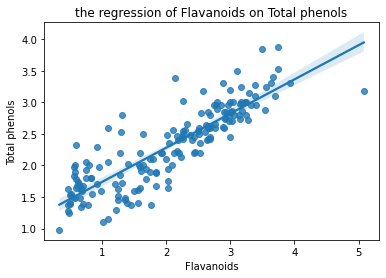

In [14]:
# plot the regression of "Flavanoids" on "Total phenols"
sns.regplot(x = "Flavanoids", y = "Total phenols", data = wine)
plt.title("the regression of Flavanoids on Total phenols")
plt.show()

### K-Means Clustering

In [15]:
# kMeans
KM = KMeans(n_clusters = 3, random_state=0)
res = KM.fit_predict(wine)

label_pred_KM = res+1
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)

centroids_KM = KM.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

inertia_KM = KM.inertia_
print("Inertia:",inertia_KM)


Labels predicted by K-Means: [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 3 1 3 3 1 1 1 3 3 2
 1 3 3 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 3 3 3 1 3 3 3 3 1 3
 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 3 3 3 1 1 3 3 1 1 3 1
 1 3 3 3 3 1 1 1 3 1 1 1 3 1 3 1 1 3 1 1 1 1 3 3 1 1 1 1 1 3]
Length of labels is same as data entry (178,)
Shape of centroids_KM (3, 13)
Centroids: [[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.901

In [ ]:
# Pairplot
wine2 = wine
wine2 ["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(wine2, hue = "cluster", diag_kind="hist", palette = 'tab10')

In [ ]:
wine.head()

### Normalize

In [ ]:
# Normalize data
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(wine)
X_scaled_array = standardScaler.transform(wine)
normalizedData = pd.DataFrame(X_scaled_array, columns = wine.columns)

# kMeans for normalized data
KM2 = KMeans(n_clusters = 3, random_state=0)
res2 = KM2.fit_predict(normalizedData)

label_pred_KM2 = res2+1
print("Labels predicted by K-Means:",label_pred_KM2)
print('Length of labels is same as data entry', label_pred_KM2.shape)

centroids_KM2 = KM2.cluster_centers_
print("Shape of centroids_KM",centroids_KM2.shape)
print("Centroids:",centroids_KM2)

inertia_KM2 = KM2.inertia_
print("Inertia:",inertia_KM2)

In [ ]:
# Pairplot for normalized data
normalizedData ["cluster"] = label_pred_KM2.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster", diag_kind="hist", palette = 'tab10')

### PCA

In [ ]:
# Apply PCA with 6 components for the normalized data
pca = PCA(n_components=6)
transformed = pd.DataFrame(pca.fit_transform(normalizedData))

# kMeans for PCA data
KM_PCA = KMeans(n_clusters = 3, random_state=0)
res_PCA = KM_PCA.fit_predict(transformed)

label_pred_KM_PCA = res_PCA+1
print("Labels predicted by K-Means:",label_pred_KM2)
print('Length of labels is same as data entry', label_pred_KM2.shape)

In [ ]:
# # Pairplot for PCA data
transformed ["cluster"] = label_pred_KM2.astype('float64')
sns_plot = sns.pairplot(transformed, hue = "cluster", diag_kind="hist", palette = 'tab10')

In [ ]:
# calculate the scores of original kMeans
adjusted_rand_score(label, label_pred_KM)

In [ ]:
# calculate the scores of kMeans after PCA
adjusted_rand_score(label, label_pred_KM_PCA)

__Conclusion:__<br>
The kMeans after PCA (0.8617967592137037) has a higher similarity than that do not apply PCA (0.37111371823084754).